In [12]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [13]:
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256)


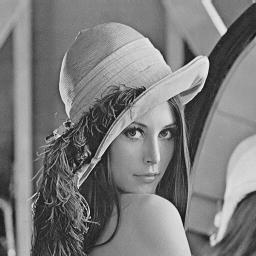

In [66]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg1.shape)
cv2_imshow(gImg1)
#plt.imshow(gImg1, cmap='gray')

In [67]:
gOutImg = np.zeros((gImg1.shape[0], gImg1.shape[1]))

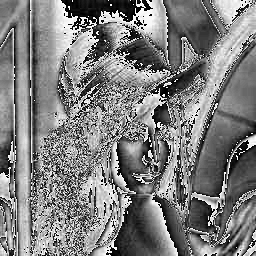

In [68]:
for h in range(0,gImg1.shape[0]):
  for w in range(0,gImg1.shape[1]):
    val = gImg1[h,w] % 64
    val = val * 4
    gOutImg[h,w] = val

#plt.imshow(gOutImg, cmap='gray')
cv2_imshow(gOutImg)

In [69]:
equalVal = 128
width = 5

min = equalVal - width
max = equalVal + width

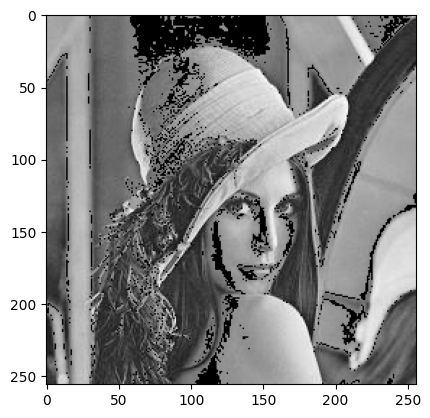

In [70]:
for h in range(0,gImg1.shape[0]):
  for w in range(0,gImg1.shape[1]):
    if(gImg1[h,w] > min and gImg1[h,w] <= max):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = gImg1[h,w]

plt.imshow(gOutImg, cmap='gray')




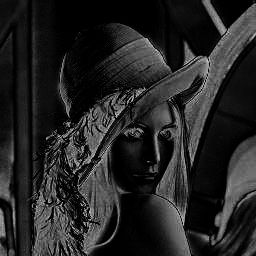

In [71]:
for h in range(0,gImg1.shape[0]):
  for w in range(0,gImg1.shape[1]):
    val = 255 *(gImg1[h,w] /128-1) * (gImg1[h,w] /128-1)
    gOutImg[h,w] = val

cv2_imshow(gOutImg)

In [72]:
planeNumber = 1
planeVlaue = 1

for i in range(planeNumber-1):
  planeVlaue = planeVlaue * 2

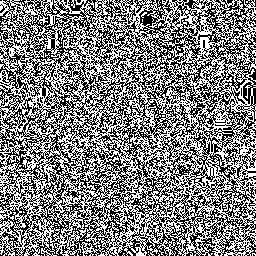

In [73]:
for h in range(0,gImg1.shape[0]):
  for w in range(0,gImg1.shape[1]):
    imVal = int(gImg1[h,w]/ planeVlaue)
    if(imVal % 2 == 0):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = 255

cv2_imshow(gOutImg)

(286, 322)


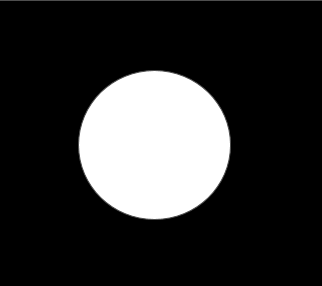

In [74]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg2.shape)
cv2_imshow(gImg2)
#plt.imshow(gImg2, cmap='gray')

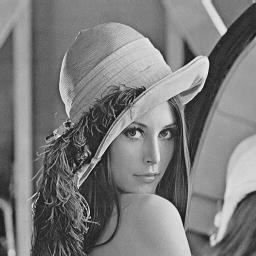

In [75]:
gWaterMarker = gImg1.copy()

for h in range(0,gImg1.shape[0]):
  for w in range(0,gImg1.shape[1]):
    imVal = gImg2[h,w]
    if(imVal > 128):
      if(gImg1[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
    else:
      if(gImg1[h,w] % 2 == 1):
        gWaterMarker[h,w] -= 1

cv2_imshow(gWaterMarker)




In [78]:
planeNumbr = 1
planeValu = 1

for i in range(planeNumbr-1):
  planeValu = planeValu * 2

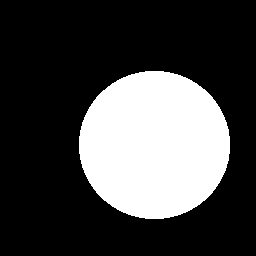

In [79]:
for h in range(0,gImg1.shape[0]):
  for w in range(0,gImg1.shape[1]):
    imVal = int(gWaterMarker[h,w]/ planeVlaue)
    if(imVal % 2 == 0):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = 255

cv2_imshow(gOutImg)